---
title: Picture classification (flowers)
author: Jamel Belgacem
date: 'July 20, 2023'
categories: [Deep learning, Picture classification]
image: "image_flowers.jpg"
format:
    html:
        code-fold: true
        code-tools: true
        code-link: true
---

Another application of deep learning is the image classification.

In this tutorial I will train a keras network to predict the class of the flower based on the picture.

### Import libraries

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Flatten, Conv2D, MaxPooling2D, Dense
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input
from keras.models import Model

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

### Read data
The data can be downloaded from [Kaggle](https://www.kaggle.com/datasets/kausthubkannan/5-flower-types-classification-dataset).

The dataset consists of 5 different flower classes: Lilly, Lotus, Sunflower, Orchid and Tulip. Each flower images are stored in one folder (1000 images)

In [2]:
data_path = 'flower_images'
os.listdir(data_path)[1:]

['Lotus', 'Tulip', 'Orchid', 'Lilly', 'Sunflower']

Pictures are resized to 224,224 pixels and transformed to array.

Pixels are stored in data list, labels contains the flower class (folder's name)

In [3]:
data_path = 'flower_images'
data=[]
labels=[]

for label, folder in enumerate(os.listdir(data_path)[1:]):
    folder_path = os.path.join(data_path,folder)
    for file_name in os.listdir(folder_path):
        picture_path = os.path.join(folder_path,file_name)
        image = load_img(picture_path, target_size=(224,224))
        image = img_to_array(image)
        data.append(image)
        labels.append(label)

data = np.array(data)
label_class =labels
labels = np.array(labels)

##### Split data into train and test
This line of code splits the 'data' and 'labels' into training and testing sets, with a test size of 20%, ensuring that 80% of the data is used for training.

By using the 'train_test_split' function from scikit-learn, this code efficiently partitions the 'data' and 'labels' into 'x_train', 'x_test', 'y_train', and 'y_test' variables, facilitating the machine learning workflow.

The 'random_state=42' parameter ensures reproducibility of the split, meaning that every time the code runs with the same 'random_state' value, it will produce the same data split, which is beneficial for result consistency and debugging.

In [4]:
x_train, x_test, y_train, y_test =train_test_split(data, labels, test_size=0.2, random_state=42)

#### Crate the neural networks
In this model, I will use a CNN architecture with four convolutional layers, each followed by max-pooling, and two fully connected layers for classification. It is designed to process images with dimensions 224x224 pixels and three color channels (RGB).

In [7]:
# building CNN
model = Sequential([
    # Conv layer 1:
    Conv2D(128, (3, 3), input_shape=(224,224,3), activation='relu', kernel_initializer="lecun_normal"),
    MaxPooling2D(pool_size = (2, 2)),
    
    # Conv layer 2:
    Conv2D(128, (3, 3), activation='relu', kernel_initializer="lecun_normal"),
    MaxPooling2D(pool_size = (2, 2)),
    
    # Conv layer 3:
    Conv2D(64, (3, 3), activation='relu', kernel_initializer="lecun_normal"),
    MaxPooling2D(pool_size = (2, 2)),
    
    # Conv layer 4:
    Conv2D(64, (3, 3), activation='relu', kernel_initializer="lecun_normal"),
    MaxPooling2D(pool_size = (2, 2)),
    
    Flatten(),
    
    # fully connected layers:
    Dense(units = 512, activation = 'relu', kernel_initializer="lecun_normal"),
    Dense(units = 5, activation = 'softmax', kernel_initializer="lecun_normal")
    
])

model.compile(optimizer = Adam(learning_rate=0.001), loss = 'sparse_categorical_crossentropy', metrics ='accuracy')
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 128)     3584      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 128)    0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 128)     147584    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 64)        73792     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 26, 26, 64)      

#### Fit the model
The next code is a crucial step where we train the "model" using the training data "x_train" and corresponding labels "y_train.".

By setting a validation split of 20%, we can monitor how well the model generalizes on unseen data during training.

The batch size is set to 32, and we train the model for 10 epochs, allowing it to learn from the data in multiple passes.

The "verbose=1" parameter provides a progress bar, so we can easily track the training process.

In [10]:
callback = EarlyStopping(monitor='accuracy', patience=5, restore_best_weights=True)
history = model.fit(x_train, y_train, validation_split=0.2, batch_size=32, epochs=10, verbose=1, callbacks=[callback])

Epoch 1/10
100/100 [==============================] - 102s 1s/step - loss: 1.5122 - accuracy: 0.3306 - val_loss: 1.9675 - val_accuracy: 0.3413
Epoch 2/10
100/100 [==============================] - 102s 1s/step - loss: 1.4289 - accuracy: 0.3825 - val_loss: 1.5192 - val_accuracy: 0.3550
Epoch 3/10
100/100 [==============================] - 103s 1s/step - loss: 1.2050 - accuracy: 0.4734 - val_loss: 1.5324 - val_accuracy: 0.3800
Epoch 4/10
100/100 [==============================] - 103s 1s/step - loss: 1.0827 - accuracy: 0.5337 - val_loss: 1.7078 - val_accuracy: 0.4062
Epoch 5/10
100/100 [==============================] - 104s 1s/step - loss: 0.8885 - accuracy: 0.6247 - val_loss: 1.5998 - val_accuracy: 0.4387
Epoch 6/10
100/100 [==============================] - 103s 1s/step - loss: 0.8036 - accuracy: 0.6787 - val_loss: 1.8512 - val_accuracy: 0.4025
Epoch 7/10
100/100 [==============================] - 103s 1s/step - loss: 0.7943 - accuracy: 0.6856 - val_loss: 2.0450 - val_accuracy: 0.4875

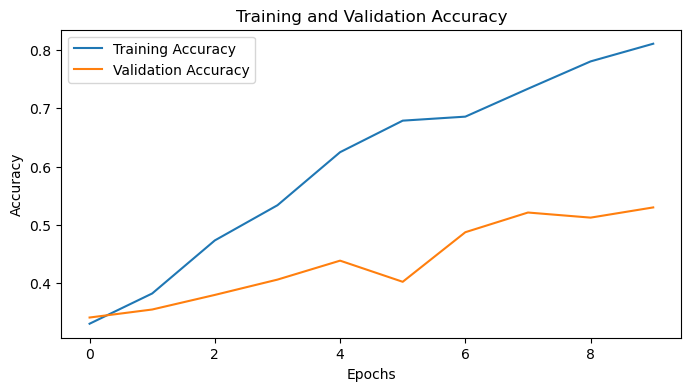

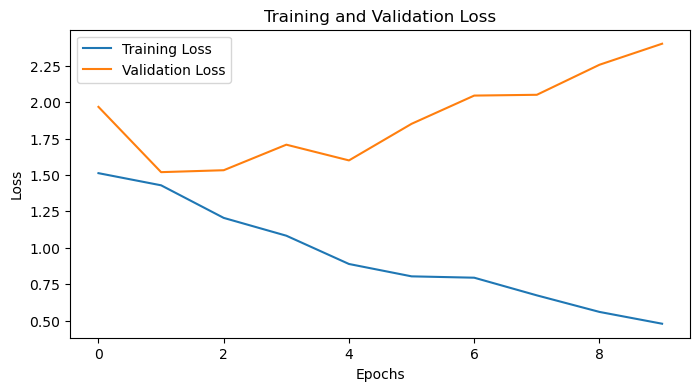

In [11]:
# Get the training and validation accuracy
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Get the training and validation loss
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot the accuracy
plt.figure(figsize=(8, 4))
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot the loss
plt.figure(figsize=(8, 4))
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

#### Accuracy
This model is not giving good accuracy as you can see in the next code:

In [12]:
y_prediction = np.argmax(model.predict(x_test), axis=1)
acc = 100*accuracy_score(y_true=y_test, y_pred=y_prediction)
print(f"Accuracy of the model: {acc:.1f} %")

32/32 [==============================] - 9s 286ms/step
Accuracy of the model: 56.4 %


In [13]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_prediction)
print(conf_matrix)

[[150  11  31  16   8]
 [ 22  94  35  26  13]
 [ 28  27 107  25   5]
 [ 24  25  38 118   5]
 [ 12  34  30  21  95]]


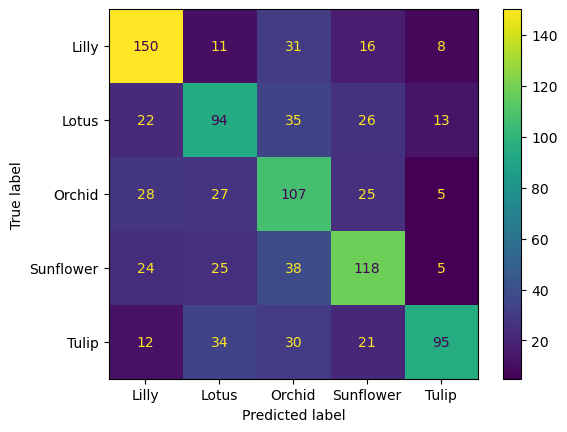

In [14]:
class_labels = ['Lilly', 'Lotus', 'Orchid', 'Sunflower', 'Tulip']
ConfusionMatrixDisplay(conf_matrix, display_labels=class_labels).plot()

This model is not very accurate, a lot of pictures are predicted as Lotus type.

### VGG16
VGG16 is a pre-trained convolutional neural network architecture that was introduced as part of the Visual Geometry Group's participation in the ImageNet Large Scale Visual Recognition Challenge (ILSVRC) in 2014.

It consists of 16 layers, including 13 convolutional layers and 3 fully connected layers, making it deeper than previous models. The network is known for its simplicity and effectiveness in image classification tasks, and its pre-trained weights can be leveraged for transfer learning, allowing developers to use it as a powerful feature extractor for a wide range of visual recognition tasks.

#### Extract features
This code defines and uses the VGG16 model pre-trained on ImageNet for feature extraction from flower images in the 'flower_images' directory.

The function 'extract_features' takes a generator, 'train_generator', and the number of samples (train_sample_count) as inputs, then it uses the VGG16 model to predict features for each batch of images, storing the extracted features and corresponding labels in 'train_features' and 'train_labels' arrays, respectively.

The ImageDataGenerator is used to preprocess the images, and the specified batch size is 32 for the feature extraction process.

In [16]:
train_dir = 'flower_images'
vgg16file = 'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
vgg16 =  VGG16(include_top=False, input_shape=(224,224,3), weights=vgg16file)

# Extract features from images using VGG16 model
def extract_features(generator, sample_count):
    features = np.zeros(shape=(sample_count, 7, 7, 512))
    labels = np.zeros(shape=(sample_count))
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = vgg16.predict(inputs_batch)
        features[i*32:(i+1)*32] = features_batch
        labels[i*32:(i+1)*32] = np.argmax(labels_batch, axis=1)
        i+=1
        if i*32>=sample_count:
            break
    return features, labels

# Specify the directory and the number of samples for feature extraction
generator = ImageDataGenerator(rescale = 1./255)
train_generator = generator.flow_from_directory(train_dir, target_size=(224,224), batch_size=32, class_mode='categorical', shuffle=True)
train_sample_count = 5000
features, labels = extract_features(train_generator, train_sample_count)
# Split data into train and test sets (80% train, 20% test)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=42)

Found 5000 images belonging to 5 classes.
1/1 [==============================] - 0s 463ms/step


#### Define and fit the model
This code defines a sequential neural network model (model4) with a Flatten layer, followed by two Dense layers (128 units with ReLU activation and 5 units with softmax activation) for a multi-class classification task.

The model is compiled with the Adam optimizer, sparse categorical cross-entropy loss, and accuracy metric.

Two callbacks, ModelCheckpoint and EarlyStopping, are specified to save the best model weights based on validation accuracy and to stop training early if validation accuracy does not improve for 20 consecutive epochs.

In [18]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
model4 = Sequential([
    Flatten(input_shape = (7,7,512)),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')
])

model4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1,save_best_only=True,
                             save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto', restore_best_weights=True)
history4 = model4.fit(train_features, train_labels, epochs=20, validation_split=0.2, callbacks=[checkpoint, early])

Epoch 1/20
 92/100 [==========================>...] - ETA: 0s - loss: 0.9843 - accuracy: 0.6821
Epoch 1: val_accuracy improved from -inf to 0.85500, saving model to vgg16_1.h5
100/100 [==============================] - 1s 7ms/step - loss: 0.9547 - accuracy: 0.6894 - val_loss: 0.4278 - val_accuracy: 0.8550
Epoch 2/20
 95/100 [===========================>..] - ETA: 0s - loss: 0.2314 - accuracy: 0.9319
Epoch 2: val_accuracy did not improve from 0.85500
100/100 [==============================] - 1s 7ms/step - loss: 0.2350 - accuracy: 0.9300 - val_loss: 0.4732 - val_accuracy: 0.8438
Epoch 3/20
 97/100 [============================>.] - ETA: 0s - loss: 0.1000 - accuracy: 0.9797
Epoch 3: val_accuracy improved from 0.85500 to 0.87625, saving model to vgg16_1.h5
100/100 [==============================] - 1s 7ms/step - loss: 0.1017 - accuracy: 0.9784 - val_loss: 0.3559 - val_accuracy: 0.8763
Epoch 4/20
 95/100 [===========================>..] - ETA: 0s - loss: 0.0520 - accuracy: 0.9941
Epoch 4: 

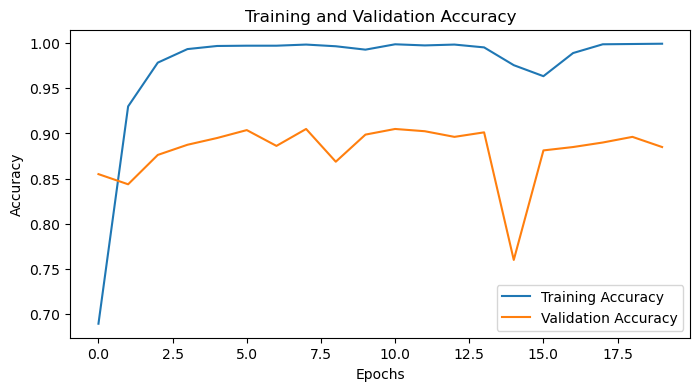

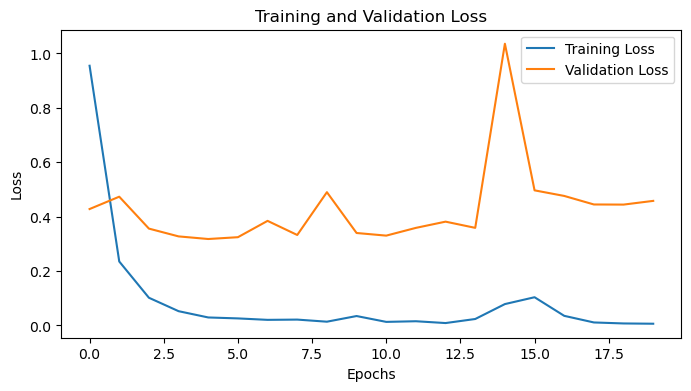

In [19]:
# Get the training and validation accuracy
training_accuracy = history4.history['accuracy']
validation_accuracy = history4.history['val_accuracy']

# Get the training and validation loss
training_loss = history4.history['loss']
validation_loss = history4.history['val_loss']

# Plot the accuracy
plt.figure(figsize=(8, 4))
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot the loss
plt.figure(figsize=(8, 4))
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

#### Accuracy of the model
This code calculates the predicted class labels ('y_prediction') using the trained 'model4' on the 'test_features' data and then computes the accuracy score by comparing the predicted labels with the true labels ('test_labels')

In [20]:
y_prediction = np.argmax(model4.predict(test_features), axis=1)
acc = accuracy_score(y_true=test_labels, y_pred=y_prediction)
print(f"Accuracy of the model using VGG16: {(acc*100):.2f} %")

32/32 [==============================] - 0s 1ms/step
Accuracy of the model using VGG16: 89.50 %


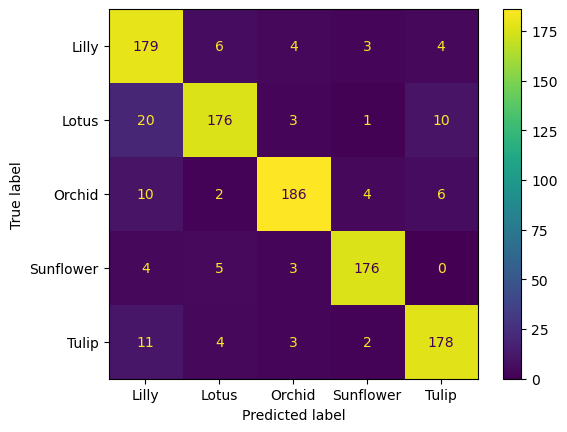

In [21]:
conf_matrix = confusion_matrix(y_true=test_labels, y_pred=y_prediction)
class_labels = ['Lilly', 'Lotus', 'Orchid', 'Sunflower', 'Tulip']
ConfusionMatrixDisplay(conf_matrix, display_labels=class_labels).plot()

>Using __VGG16__ as a feature extraction model significantly boosts the accuracy of the overall model, as evidenced by the improved performance when predicting on the 'test_features' data compared to a traditional approach without leveraging the VGG16 features.

This code downloads an image (Tulip) from a specified URL into a temporary folder.

The 'model4' predicts the class probabilities for the new image, and the label with the highest probability is determined as the predicted class (Tulip).

1/1 [==============================] - 0s 9ms/step
[[3.4171019e-02 7.6658607e-06 3.8200712e-03 1.6338839e-07 9.6200109e-01]]
4
Predicted label: Tulip


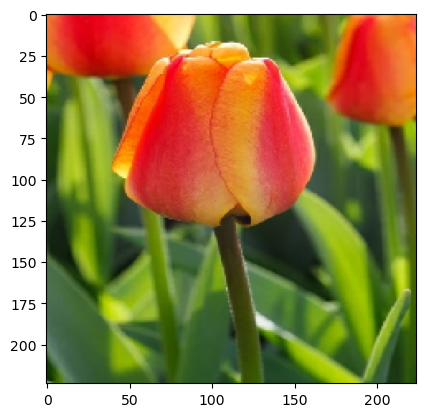

In [22]:
# Download picture from URL on temporary folder
import urllib.request
import tempfile

url = "https://images.all-free-download.com/images/graphicwebp/beautiful_tulip_199087.webp"
tempfile_path =tempfile.mktemp()
urllib.request.urlretrieve(url, tempfile_path)


new_image = load_img(tempfile_path, target_size=(224,224))

im=plt.imshow(np.asarray(new_image))
im

class_labels = ['Lilly', 'Lotus', 'Orchid', 'Sunflower', 'Tulip']

new_image = img_to_array(new_image)
new_image = np.expand_dims(new_image, axis=0)
new_image = new_image / 255.0  # Normalize the image

# Extract features from the new image using VGG16 model
new_features = vgg16.predict(new_image)

# Make prediction on the new image
prediction = model4.predict(new_features)
print(prediction)
predicted_label = np.argmax(prediction)
print(predicted_label)
print("Predicted label:", class_labels[predicted_label])

### Conclusion
In conclusion, incorporating VGG16 as a feature extraction model has proven to be highly effective in improving the accuracy of image predictions.

By leveraging the powerful pre-trained VGG16 architecture, the model gains the ability to capture intricate patterns and high-level features from images, leading to more precise and reliable predictions. This makes it a valuable choice for various image recognition and classification tasks, providing a solid foundation for achieving superior results in the domain of computer vision.